In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier 

In [2]:
df_train= pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
df_train.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [6]:
print(df_train.isnull().any().count())

563


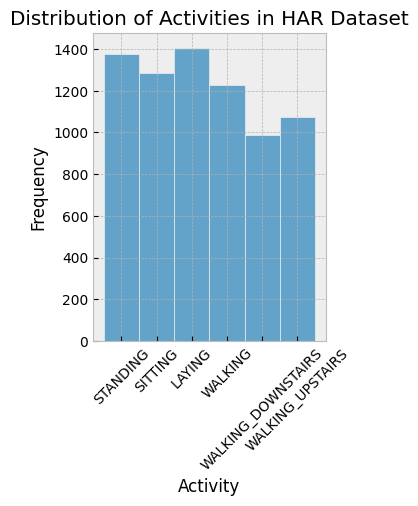

In [7]:
# Extract the target labels
value= df_train['Activity']

# Plot the histogram
plt.figure(figsize=(3, 4))
sns.histplot(value, kde=False, bins=len(value.unique()))
plt.xlabel('Activity')
plt.ylabel('Frequency')
plt.title('Distribution of Activities in HAR Dataset')
plt.xticks(rotation=45)
plt.show()

In [8]:
df_train['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [9]:
X_train = df_train.drop(["Activity"], axis=1)
#X_Features = X_train.columns

In [10]:
X_train.shape

(7352, 562)

In [11]:
y_train = df_train['Activity']

In [12]:
#encoding
from sklearn import preprocessing

# Creating LabelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers
y_train = le.fit_transform(y_train)

print(y_train)

[2 2 2 ... 5 5 5]


In [13]:
y_train.shape

(7352,)

In [14]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [15]:
df_train.columns.tolist()

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [16]:
# splitting the train data by kf
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, shuffle=True, random_state=42)

In [17]:
df_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [19]:
df_test.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [20]:
df_test.isnull().any()

tBodyAcc-mean()-X       False
tBodyAcc-mean()-Y       False
tBodyAcc-mean()-Z       False
tBodyAcc-std()-X        False
tBodyAcc-std()-Y        False
                        ...  
angle(X,gravityMean)    False
angle(Y,gravityMean)    False
angle(Z,gravityMean)    False
subject                 False
Activity                False
Length: 563, dtype: bool

In [21]:
X_test = df_test.drop(["Activity"], axis=1)

In [22]:
X_test.shape

(2947, 562)

In [23]:
y_test = df_test['Activity']

In [24]:
#endcoing
from sklearn import preprocessing

# Creating LabelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers
y_test = le.fit_transform(y_test)

print(y_test)

[2 2 2 ... 5 5 5]


In [25]:
y_test.shape

(2947,)

In [26]:
df_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [27]:
df_test.columns.tolist()

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [28]:
# Define classifiers
classifiers = {
    "KNN" : KNeighborsClassifier(),
    "RandomForestCalssifier": RandomForestClassifier(),
    "NearestCentroid" : NearestCentroid(),
    "SVC" : SVC(),
    "GaussianNB" : GaussianNB(),
    "LogisticRegression" : LogisticRegression(solver='liblinear'),
    "LinearSVC" : LinearSVC()
}

#create an empty dictionary results
results = {}

In [29]:
# numpy random seed to fix the result numbers
np.random.seed(42)

# for loop for classifier dictionary to fit the models on the traing data
# and appending the classifier name and the score on the test data to the result dictionary
for classifiers_name, classifiers in classifiers.items():
    classifiers.fit(X_train,y_train)
    results[classifiers_name] = classifiers.score(X_test, y_test)

results

{'KNN': 0.8096369189005769,
 'RandomForestCalssifier': 0.9267051238547676,
 'NearestCentroid': 0.7115710892432983,
 'SVC': 0.9307770614183916,
 'GaussianNB': 0.7702748557855447,
 'LogisticRegression': 0.9613165931455717,
 'LinearSVC': 0.9653885307091958}

In [30]:
# create result data frame 
result_df = pd.DataFrame(
    results.values(),
    results.keys(),
    columns = ["accuracy"]
)

In [31]:
result_df

,accuracy
KNN,0.809637
RandomForestCalssifier,0.926705
NearestCentroid,0.711571
SVC,0.930777
GaussianNB,0.770275
LogisticRegression,0.961317
LinearSVC,0.965389


<Axes: >

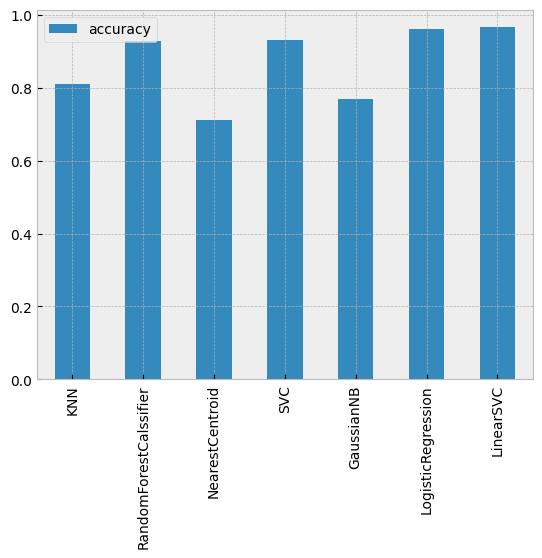

In [32]:
# create a bar plot of hte result data frame
result_df.plot.bar()

In [ ]:
# different LinearSVC hyperparamters
linearSVC_grid =  {"C" : np.logspace(-4, 4, 20)} 

In [ ]:
# Set up np random seed of 42
np.random.seed(42)

#import RandomizedSearchCV 
from sklearn.model_selection import RandomizedSearchCV

# Setup an insrance of RandomizedSearchCV with LinearSVC() estimator
# our linearSVC_grid as the param_distributions, a cv of kf and n_iter of 10.
rs_linearSVC = RandomizedSearchCV(estimator=LinearSVC(),
                                  param_distributions= linearSVC_grid,
                                  cv=kf,
                                  n_iter=10,
                                  verbose=1
                                  )

# fit the instance of RandomizedSearchCV

rs_linearSVC.fit(X_train,y_train)


Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=LinearSVC(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])},
                   verbose=1)

In [35]:
# Find the best parameters of the RandomizedSearchCV instance using the best_params_ attribute
rs_linearSVC.best_params_

{'C': np.float64(0.23357214690901212)}

In [36]:
# Score the instance if RandomizedSearchCV using the test data
rs_linearSVC.best_score_

np.float64(0.9862622415669207)

In [37]:
# instantiate LinearSVC using the best hyperparamters from RamdomizedSearchCV
# using ** because model doesn't take dictionary, so we convert : to = in it.
clf = LinearSVC(** rs_linearSVC.best_params_)

# fit the new instance of LinearSVC by using best hyperparameters on the combined training and validating data
clf.fit(X_train, y_train)

LinearSVC(C=np.float64(0.23357214690901212))

In [38]:
# Make predictions on the test data and save them
y_pred = clf.predict(X_test)

In [39]:
# import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [40]:
#create a confusion matrix using confusion_matrix function
confusion_matrix(y_test, y_pred)

array([[537,   0,   0,   0,   0,   0],
       [  1, 426,  60,   0,   0,   4],
       [  0,  11, 520,   1,   0,   0],
       [  0,   0,   0, 496,   0,   0],
       [  0,   0,   0,   3, 412,   5],
       [  0,   0,   0,  26,   0, 445]])

In [41]:
# create a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.97      0.87      0.92       491
           2       0.90      0.98      0.94       532
           3       0.94      1.00      0.97       496
           4       1.00      0.98      0.99       420
           5       0.98      0.94      0.96       471

    accuracy                           0.96      2947
   macro avg       0.97      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [42]:
# Import the dump and load functions from the joblib library
from joblib import load, dump

In [43]:
# Use the dump function to export the trained  modile to file
dump(clf,"clf_model.joblib")

['clf_model.joblib']

In [44]:
# Use the load function to import the trained model you just exported
# Save it to a different variable name to the original trained model
loaded_model = load("clf_model.joblib")

# Evaluate the loaded trained model on the test data
print(f"Model score:{clf.score(X_test, y_test)}")
print(f"Loaded model score:{loaded_model.score(X_test, y_test)}")

Model score:0.9623345775364778
Loaded model score:0.9623345775364778
